In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create synthetic time series data (Temperature and Humidity)
np.random.seed(42)
n_points = 100
time = pd.date_range('2023-01-01', periods=n_points, freq='D')

# Generating synthetic data (with anomalies injected)
temperature = np.random.normal(loc=22, scale=5, size=n_points)  # Normal temperature data
humidity = np.random.normal(loc=60, scale=10, size=n_points)  # Normal humidity data

# Injecting anomalies in both variables
temperature[30] = 35  # Injecting an anomaly in temperature
humidity[60] = 90     # Injecting an anomaly in humidity

# Create DataFrame
df = pd.DataFrame({'Time': time, 'Temperature': temperature, 'Humidity': humidity})


In [5]:
df

,Time,Temperature,Humidity
0,2023-01-01,24.483571,45.846293
1,2023-01-02,21.308678,55.793547
2,2023-01-03,25.238443,56.572855
3,2023-01-04,29.615149,51.977227
4,2023-01-05,20.829233,58.387143
...,...,...,...
95,2023-04-06,14.682425,63.853174
96,2023-04-07,23.480601,51.161426
97,2023-04-08,23.305276,61.537251
98,2023-04-09,22.025567,60.582087


In [ ]:
# Standardize the data (important for anomaly detection)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[['Temperature', 'Humidity']]), columns=['Temperature', 'Humidity'])

In [7]:
# Step 2: Use Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # Set contamination based on expected anomaly percentage
df['Anomaly'] = iso_forest.fit_predict(df_scaled)

In [9]:
df

,Time,Temperature,Humidity,Anomaly
0,2023-01-01,24.483571,45.846293,1
1,2023-01-02,21.308678,55.793547,1
2,2023-01-03,25.238443,56.572855,1
3,2023-01-04,29.615149,51.977227,1
4,2023-01-05,20.829233,58.387143,1
...,...,...,...,...
95,2023-04-06,14.682425,63.853174,1
96,2023-04-07,23.480601,51.161426,1
97,2023-04-08,23.305276,61.537251,1
98,2023-04-09,22.025567,60.582087,1


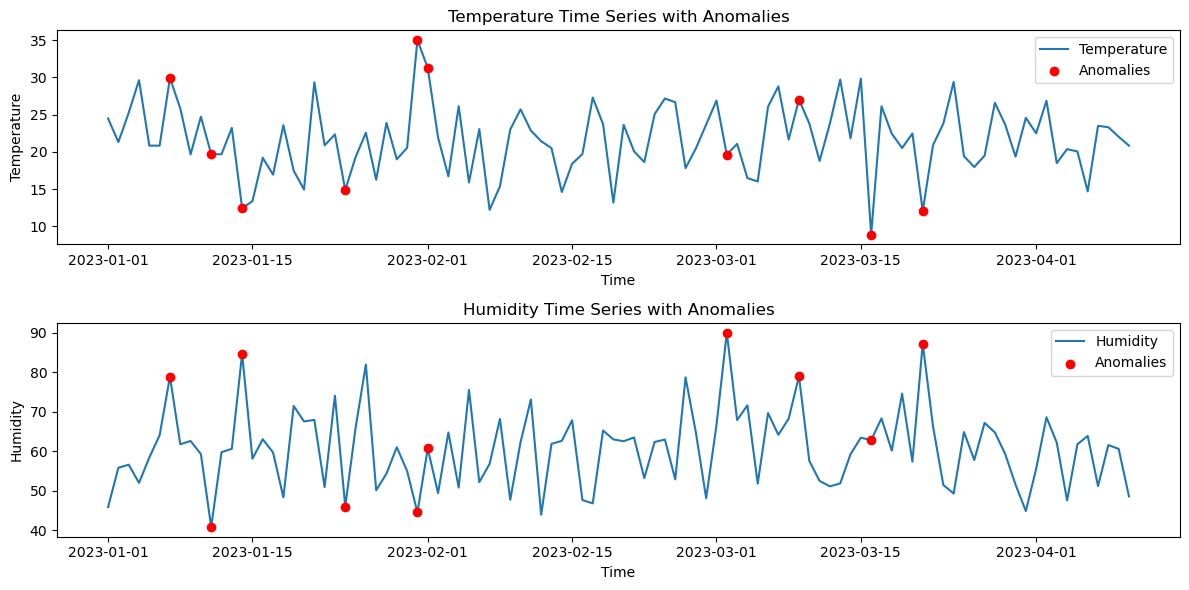

Anomalies detected at indices: [6, 10, 13, 23, 30, 31, 60, 67, 74, 79]


In [8]:
# Step 3: Visualize the results
plt.figure(figsize=(12, 6))

# Plot Temperature
plt.subplot(2, 1, 1)
plt.plot(df['Time'], df['Temperature'], label='Temperature')
plt.scatter(df['Time'][df['Anomaly'] == -1], df['Temperature'][df['Anomaly'] == -1], color='red', label='Anomalies', zorder=5)
plt.title('Temperature Time Series with Anomalies')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()

# Plot Humidity
plt.subplot(2, 1, 2)
plt.plot(df['Time'], df['Humidity'], label='Humidity')
plt.scatter(df['Time'][df['Anomaly'] == -1], df['Humidity'][df['Anomaly'] == -1], color='red', label='Anomalies', zorder=5)
plt.title('Humidity Time Series with Anomalies')
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.legend()

plt.tight_layout()
plt.show()

# Output the detected anomalies
anomalies = df[df['Anomaly'] == -1]
print("Anomalies detected at indices:", anomalies.index.tolist())

In [12]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[354   1]
 [  1   9]]


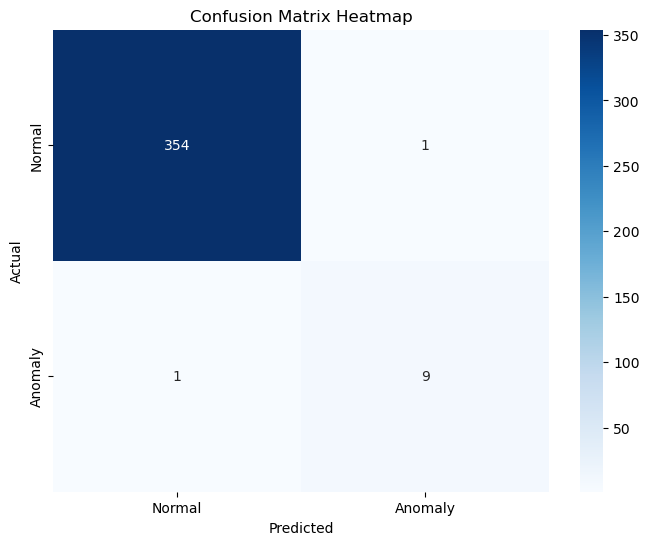

In [13]:
import seaborn as sns

# Visualize the confusion matrix using a heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], 
            yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
# Step 4: Additional metrics
print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       355
         1.0       0.90      0.90      0.90        10

    accuracy                           0.99       365
   macro avg       0.95      0.95      0.95       365
weighted avg       0.99      0.99      0.99       365



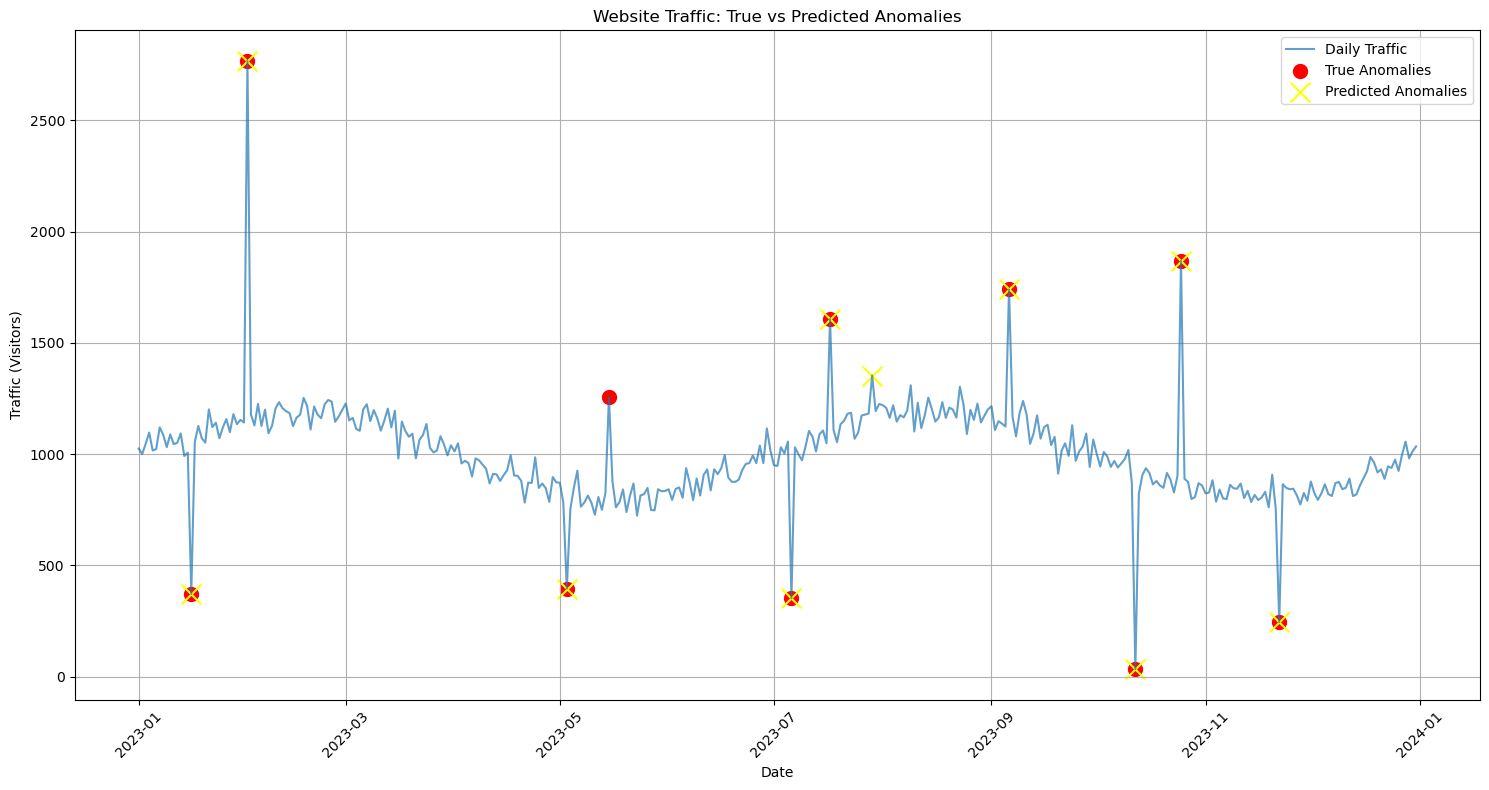

In [16]:
plt.figure(figsize=(15, 8))

# Plot the original traffic data
plt.plot(df['date'], df['traffic'], label='Daily Traffic', alpha=0.7)

# Plot true anomalies
plt.scatter(df['date'][y_true == 1], df['traffic'][y_true == 1], 
           color='red', label='True Anomalies', s=100, marker='o')

# Plot predicted anomalies
plt.scatter(df['date'][y_pred == 1], df['traffic'][y_pred == 1], 
           color='yellow', label='Predicted Anomalies', s=200, marker='x')

plt.title('Website Traffic: True vs Predicted Anomalies')
plt.xlabel('Date')
plt.ylabel('Traffic (Visitors)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()